In [44]:
import pandas as pd
import plotly
import plotly.graph_objects as go

In [45]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)

In [46]:
import os

if not os.path.exists("images"):
    os.mkdir("images")

In [47]:
pd.options.plotting.backend = "plotly"
svg_option = "svg"

In [48]:
## read data from news_ratings_df.csv
news_ratings_data = pd.read_csv('news_ratings_df.csv', index_col=None)

In [49]:
news_ratings_data.head()

,id,date,updated,title,caption,expandedLinks,link,postUrl,subscriberCount,score,account_id,account_name,account_handle,account_subscriberCount,account_url,account_accountType,account_pageAdminTopCountry,account_verified,statistics_likeCount,statistics_shareCount,statistics_commentCount,statistics_loveCount,statistics_wowCount,statistics_hahaCount,statistics_sadCount,statistics_angryCount,statistics_thankfulCount,statistics_careCount,domain,rating,credible
0,111622404459,2020-11-22 23:59:49,2020-11-25 18:13:36,L.A. County suspends outdoor dining at restaurants as coronavirus surges,latimes.com,https://www.latimes.com/california/story/2020-11-22/l-a-county-suspends-outdoor-dining-at-restaurants-as-coronavirus-surges,https://www.latimes.com/california/story/2020-11-22/l-a-county-suspends-outdoor-dining-at-restaurants-as-coronavirus-surges,https://www.facebook.com/edgarreece/posts/3504433216313464,2351,3.739130,4619429,Council Member Ed Reece,edgarreece,2354,https://www.facebook.com/165175133572639,facebook_page,US,True,9,32,23,0,2,1,9,10,0,0,latimes.com,100.0,True
1,111678477449,2020-11-23 23:59:58,2020-11-25 18:17:53,Trump Administration To Begin Biden Transition Protocols,npr.org,https://www.npr.org/2020/11/23/937956178/trump-administration-to-begin-biden-transition-protocols?utm_source=facebook.com&utm_term=nprnews&utm_campaign=npr&utm_medium=social,https://www.npr.org/2020/11/23/937956178/trump-administration-to-begin-biden-transition-protocols?utm_source=facebook.com&utm_term=nprnews&utm_campaign=npr&utm_medium=social,https://www.facebook.com/OccupySpokane/posts/3477341109030911,21775,2.333333,4619429,Council Member Ed Reece,edgarreece,2354,https://www.facebook.com/165175133572639,facebook_page,US,True,9,32,23,0,2,1,9,10,0,0,npr.org,100.0,True
2,111737873253,2020-11-24 23:59:23,2020-11-25 16:15:55,"Russia, eyeing foreign markets, says Sputnik COVID-19 vaccine to cost under $20",reuters.com,https://reut.rs/39bWCNG,https://reut.rs/39bWCNG,https://www.facebook.com/groups/335017933691230/permalink/962329240960093,18498,-21.000000,4619429,Council Member Ed Reece,edgarreece,2354,https://www.facebook.com/165175133572639,facebook_page,US,True,9,32,23,0,2,1,9,10,0,0,reut.rs,100.0,True
3,111622415061,2020-11-22 23:59:48,2020-11-25 18:11:01,This is a re-share of a post,NaN,https://m.youtube.com/watch?v=6BsluRkxs78&feature=youtu.be,https://www.facebook.com/100576118560804/posts/100621611889588/,https://www.facebook.com/groups/378361242549568/permalink/1253075498411467,388,-0.750000,12571754,Australia & New Zealand Geoengineering Watch,NaN,388,https://www.facebook.com/groups/378361242549568,facebook_group,NaN,False,103,11,3,15,0,1,0,0,0,0,m.youtube.com,-1.0,False
4,111622415061,2020-11-22 23:59:48,2020-11-25 18:11:01,This is a re-share of a post,NaN,https://www.facebook.com/6442438662/posts/10157599122463663/?d=n,https://www.facebook.com/100576118560804/posts/100621611889588/,https://www.facebook.com/groups/378361242549568/permalink/1253075498411467,388,-0.750000,12571754,Australia & New Zealand Geoengineering Watch,NaN,388,https://www.facebook.com/groups/378361242549568,facebook_group,NaN,False,103,11,3,15,0,1,0,0,0,0,facebook.com,-1.0,False


## General Characterization

In [50]:
news_ratings_data.columns

Index(['id', 'date', 'updated', 'title', 'caption', 'expandedLinks', 'link',
       'postUrl', 'subscriberCount', 'score', 'account_id', 'account_name',
       'account_handle', 'account_subscriberCount', 'account_url',
       'account_accountType', 'account_pageAdminTopCountry',
       'account_verified', 'statistics_likeCount', 'statistics_shareCount',
       'statistics_commentCount', 'statistics_loveCount',
       'statistics_wowCount', 'statistics_hahaCount', 'statistics_sadCount',
       'statistics_angryCount', 'statistics_thankfulCount',
       'statistics_careCount', 'domain', 'rating', 'credible'],
      dtype='object')

In [51]:
'en.wikipedia.org' in news_ratings_data.domain.unique()

True

In [52]:
len(news_ratings_data)

440477

In [53]:
### number of posts
posts = news_ratings_data['id']
print('#Unique Posts: ', len(posts.unique()))

#Unique Posts:  376201


In [54]:
### number of unique URLs
urls = news_ratings_data['expandedLinks']
print('#Total URLs: ', len(urls))
print('#Unique URLs: ', len(urls.unique()))

#Total URLs:  440477
#Unique URLs:  238445


In [55]:
### number of users
users = news_ratings_data['account_id']
print('#Users: ', len(users.unique()))

#Users:  40228


In [56]:
### number of credible and non-credible articles
credibility_summary = news_ratings_data[['id', 'credible']].groupby('credible').count().sort_values('id', ascending=False).reset_index()

In [57]:
credibility_summary

,credible,id
0,True,320763
1,False,119714


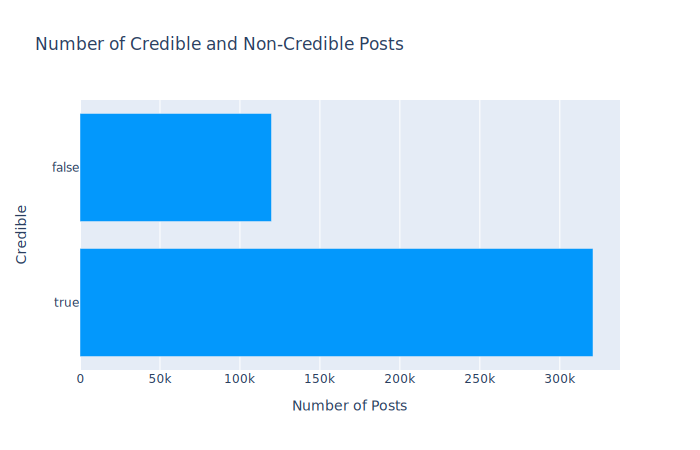

In [89]:
fig = go.Figure(data=go.Bar(x=credibility_summary.id, y=credibility_summary.credible, orientation='h', marker={'color':'#0398fc'}))
fig.update_layout(
    title="Number of Credible and Non-Credible Posts",
    yaxis_title="Credible",
    xaxis_title="Number of Posts")
fig.show(svg_option)

In [91]:
fig.write_image("images/credible_noncredible_count.png")

In [59]:
news_ratings_data['date'] = pd.to_datetime(news_ratings_data.date)

In [60]:
news_ratings_data['hour'] = news_ratings_data.date.dt.floor('h')

In [61]:
cred_df = pd.pivot_table(news_ratings_data, values = 'id', index = 'hour',
               columns = 'credible',aggfunc ='count').reset_index()

In [62]:
cred_df.head()

credible,hour,False,True
0,2020-11-22 00:00:00,1591,4372
1,2020-11-22 01:00:00,1403,4107
2,2020-11-22 02:00:00,1171,3770
3,2020-11-22 03:00:00,1047,3279
4,2020-11-22 04:00:00,1156,2741


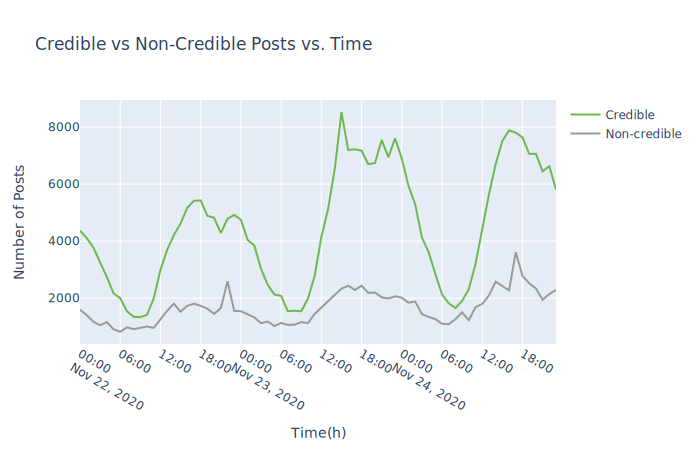

In [92]:
fig = go.Figure(data=go.Scatter(x=cred_df.hour, y=cred_df[True],mode='lines', line_color='#6db84d', name='Credible'))
fig.add_trace(go.Scatter(x=cred_df.hour, y=cred_df[False],mode='lines', line=dict(color="#979c95"), name='Non-credible'))
fig.update_xaxes(nticks=12)
fig.update_layout(
    title="Credible vs Non-Credible Posts vs. Time",
    xaxis_title="Time(h)",
    yaxis_title="Number of Posts")

fig.show(svg_option)

In [93]:
fig.write_image("images/credible_noncredible_over_time.png")

## Popularity Analysis

In [64]:
domains = pd.pivot_table(news_ratings_data, values = 'id',index = ['domain', 'rating', 'credible'], aggfunc ='count').sort_values(['rating', 'id'], ascending=False).reset_index()

In [65]:
'en.wikipedia.org' in news_ratings_data.domain.unique()

True

In [66]:
len(news_ratings_data.domain.unique())

7038

In [67]:
'en.wikipedia.org' in domains.domain.unique()

True

In [68]:
len(domains.domain.unique())

7037

In [69]:
set(news_ratings_data.domain.unique()).difference(set(domains.domain.unique()))

{nan}

In [70]:
# news_ratings_data[~news_ratings_data.domain.isin(domains.domain.unique())]
news_ratings_data[news_ratings_data.domain == '.']

,id,date,updated,title,caption,expandedLinks,link,postUrl,subscriberCount,score,account_id,account_name,account_handle,account_subscriberCount,account_url,account_accountType,account_pageAdminTopCountry,account_verified,statistics_likeCount,statistics_shareCount,statistics_commentCount,statistics_loveCount,statistics_wowCount,statistics_hahaCount,statistics_sadCount,statistics_angryCount,statistics_thankfulCount,statistics_careCount,domain,rating,credible,hour
117564,111703702337,2020-11-24 12:46:03,2020-11-25 19:16:20,NaN,NaN,www..,https://www.facebook.com/goodbusinessph/photos/a.122474952626649/225081182366025/?type=3,https://www.facebook.com/groups/1613550218909369/permalink/2639058889691825,3502,-24.0,37756,Scotts Valley Patch,scottsvalleypatch,629,https://www.facebook.com/168810009796475,facebook_page,NaN,False,108,18,198,1,7,6,25,140,0,0,.,-1.0,False,2020-11-24 12:00:00
117570,111704683295,2020-11-24 12:45:54,2020-11-25 18:48:25,NaN,NaN,www..,https://www.facebook.com/goodbusinessph/photos/a.122474952626649/225081182366025/?type=3,https://www.facebook.com/groups/1710445832541836/permalink/2809070756012666,30763,-118.0,37888,Santa Monica Patch,SantaMonicaPatch,2315,https://www.facebook.com/152612108100468,facebook_page,US,False,3,2,1,1,0,0,0,0,0,0,.,-1.0,False,2020-11-24 12:00:00


In [71]:
domains.head()

,domain,rating,credible,id
0,patch.com,100.0,True,37113
1,theguardian.com,100.0,True,8353
2,nytimes.com,100.0,True,7845
3,cnn.com,100.0,True,7385
4,nbcnews.com,100.0,True,5412


In [72]:
## credible news sources sorted by rating and number of posts
credible_domains = domains[domains.credible == True]

In [73]:
print("Number of Credible Domains: ", len(credible_domains))
print("Top 20 Credible Domains: ")
print(credible_domains[['domain', 'rating']][0:20])

Number of Credible Domains:  999
Top 20 Credible Domains: 
                 domain  rating
0             patch.com   100.0
1       theguardian.com   100.0
2           nytimes.com   100.0
3               cnn.com   100.0
4           nbcnews.com   100.0
5    washingtonpost.com   100.0
6   businessinsider.com   100.0
7               npr.org   100.0
8                cbc.ca   100.0
9           cbsnews.com   100.0
10         usatoday.com   100.0
11          reuters.com   100.0
12         politico.com   100.0
13              wsj.com   100.0
14          latimes.com   100.0
15         newsweek.com   100.0
16              pbs.org   100.0
17             vice.com   100.0
18           ctvnews.ca   100.0
19               cnn.it   100.0


In [74]:
## non-credible news sources sorted by rating and number of posts
# noncredible_domains = domains[domains.credible == False].sort_values('rating', ascending=True)
noncredible_domains = domains[(domains['credible'] == False) & (domains['rating'] != -1.0)].sort_values('rating', ascending=True)

In [75]:
print("Number of Non-Credible Domains: ", len(noncredible_domains))
print("Top 20 Non-Credible Domains: ")
print(noncredible_domains[['domain', 'rating']][0:20])

Number of Non-Credible Domains:  34
Top 20 Non-Credible Domains: 
                            domain  rating
1032                 zerohedge.com     0.0
1031      worldnewsdailyreport.com     7.5
1030               sputniknews.com     7.5
1029               naturalnews.com    12.5
1028              yournewswire.com    15.0
1027  theconservativetreehouse.com    17.5
1026                  lifenews.com    17.5
1025              lifesitenews.com    17.5
1024          thegatewaypundit.com    20.0
1022                       wnd.com    25.0
1023                  infowars.com    25.0
1021           americanthinker.com    27.5
1020                gregpalast.com    32.0
1019                  arabnews.com    32.0
1018                        rt.com    32.5
1017            westernjournal.com    32.5
1016         middleeastmonitor.com    40.0
1015                  theblaze.com    40.0
1013                   pjmedia.com    42.0
1012                  redstate.com    42.0


#### Popularity of credible sources over time

In [76]:
credible_top20_domains = credible_domains[['domain']][0:5]
credible_top20_list = credible_top20_domains['domain'].to_list()
print(credible_top20_list)

['patch.com', 'theguardian.com', 'nytimes.com', 'cnn.com', 'nbcnews.com']


In [77]:
credible_top20_trend_df =  pd.pivot_table(news_ratings_data[news_ratings_data['domain'].isin(credible_top20_list)], values = 'id',index = 'hour', columns = 'domain', aggfunc ='count').sort_values(['hour'], ascending=True).reset_index()

In [78]:
credible_top20_trend_df.head()

domain,hour,cnn.com,nbcnews.com,nytimes.com,patch.com,theguardian.com
0,2020-11-22 00:00:00,203,91,100,436,109
1,2020-11-22 01:00:00,137,93,128,450,65
2,2020-11-22 02:00:00,80,75,89,326,94
3,2020-11-22 03:00:00,86,53,99,280,63
4,2020-11-22 04:00:00,91,32,100,74,62


#### The time axis is in hour, which can be changed to date when we have more data

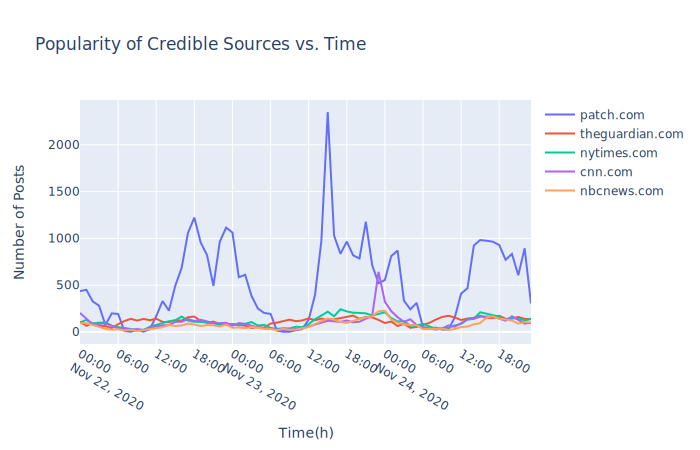

In [94]:
fig = go.Figure(data=go.Scatter(x=credible_top20_trend_df.hour, y=credible_top20_trend_df[credible_top20_list[0]],mode='lines', name=credible_top20_list[0]))
for col in credible_top20_list[1:]:
                fig.add_trace(go.Scatter(x=credible_top20_trend_df.hour, y=credible_top20_trend_df[col],mode='lines', name=col))
fig.update_xaxes(nticks=12)
fig.update_layout(
title="Popularity of Credible Sources vs. Time",
xaxis_title="Time(h)",
yaxis_title="Number of Posts")
fig.show(svg_option)

In [95]:
fig.write_image("images/top_credible_over_time.png")

#### Popularity of non-credible sources over time

In [80]:
noncredible_top20_domains = noncredible_domains[['domain']][0:5]
noncredible_top20_list = noncredible_top20_domains['domain'].to_list()
print(noncredible_top20_list)

['zerohedge.com', 'worldnewsdailyreport.com', 'sputniknews.com', 'naturalnews.com', 'yournewswire.com']


In [81]:
noncredible_top20_trend_df =  pd.pivot_table(news_ratings_data[news_ratings_data['domain'].isin(noncredible_top20_list)], values = 'id',index = 'hour', columns = 'domain', aggfunc ='count').sort_values(['hour'], ascending=True).reset_index()

In [82]:
noncredible_top20_trend_df.head()

domain,hour,naturalnews.com,sputniknews.com,worldnewsdailyreport.com,yournewswire.com,zerohedge.com
0,2020-11-22 00:00:00,NaN,1.0,NaN,NaN,8.0
1,2020-11-22 01:00:00,NaN,4.0,NaN,NaN,5.0
2,2020-11-22 02:00:00,NaN,2.0,NaN,NaN,10.0
3,2020-11-22 03:00:00,NaN,6.0,NaN,NaN,10.0
4,2020-11-22 04:00:00,NaN,1.0,NaN,2.0,9.0


#### The time axis is in hour, which can be changed to date when we have more data

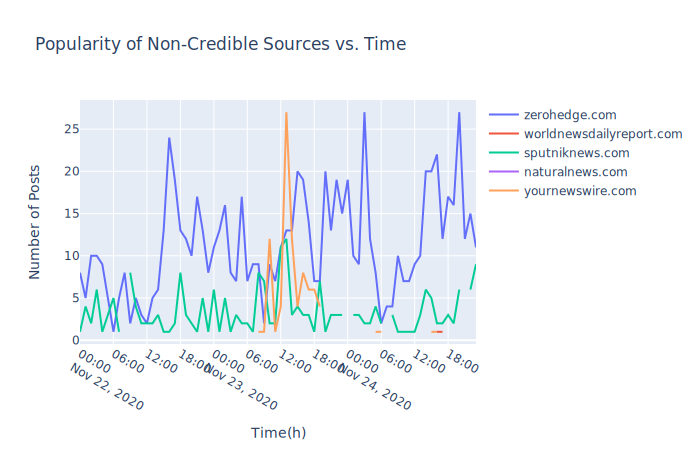

In [96]:
fig = go.Figure(data=go.Scatter(x=noncredible_top20_trend_df.hour, y=noncredible_top20_trend_df[noncredible_top20_list[0]],mode='lines', name=noncredible_top20_list[0]))
for col in noncredible_top20_list[1:]:
                fig.add_trace(go.Scatter(x=noncredible_top20_trend_df.hour, y=noncredible_top20_trend_df[col],mode='lines', name=col))
fig.update_xaxes(nticks=12)
fig.update_layout(
title="Popularity of Non-Credible Sources vs. Time",
xaxis_title="Time(h)",
yaxis_title="Number of Posts")
fig.show(svg_option)

In [97]:
fig.write_image("images/top_noncredible_over_time.png")

## Engagement Analysis

In [84]:
## Plot the CDF of the likes, shares, and all other engagement metrics for both credible and non-credible articles


In [85]:
## news sources that attract the most engagement
news_ratings_data.columns

Index(['id', 'date', 'updated', 'title', 'caption', 'expandedLinks', 'link',
       'postUrl', 'subscriberCount', 'score', 'account_id', 'account_name',
       'account_handle', 'account_subscriberCount', 'account_url',
       'account_accountType', 'account_pageAdminTopCountry',
       'account_verified', 'statistics_likeCount', 'statistics_shareCount',
       'statistics_commentCount', 'statistics_loveCount',
       'statistics_wowCount', 'statistics_hahaCount', 'statistics_sadCount',
       'statistics_angryCount', 'statistics_thankfulCount',
       'statistics_careCount', 'domain', 'rating', 'credible', 'hour'],
      dtype='object')

In [86]:
statistics = pd.pivot_table(news_ratings_data, values = 'id',index = ['domain', 'rating', 'credible', 'statistics_likeCount', 'statistics_shareCount',
       'statistics_commentCount', 'statistics_loveCount',
       'statistics_wowCount', 'statistics_hahaCount', 'statistics_sadCount',
       'statistics_angryCount', 'statistics_thankfulCount',
       'statistics_careCount'], aggfunc ='count').sort_values(['domain', 'rating', 'credible', 'id']).reset_index()

In [87]:
statistics

,domain,rating,credible,statistics_likeCount,statistics_shareCount,statistics_commentCount,statistics_loveCount,statistics_wowCount,statistics_hahaCount,statistics_sadCount,statistics_angryCount,statistics_thankfulCount,statistics_careCount,id
0,.,-1.0,False,3,2,1,1,0,0,0,0,0,0,1
1,.,-1.0,False,108,18,198,1,7,6,25,140,0,0,1
2,..,-1.0,False,0,0,0,0,0,0,0,0,0,0,1
3,..,-1.0,False,1,1,0,0,1,0,0,0,0,0,1
4,..,-1.0,False,1,4,0,0,0,0,10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211078,zradiolive.com,-1.0,False,39,0,12,7,0,0,0,0,0,0,1
211079,zradiolive.com,-1.0,False,41,10,15,7,1,8,0,2,0,0,1
211080,zradiolive.com,-1.0,False,71,1,13,29,0,0,0,0,0,1,1
211081,zradiolive.com,-1.0,False,272,22,21,34,0,0,0,0,0,1,1
